In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import KeyedVectors,Word2Vec

import warnings
warnings.filterwarnings("ignore")

In [36]:
df_true = pd.read_csv("/content/True.csv", error_bad_lines = False, engine = "python")

df_fake = pd.read_csv("/content/Fake.csv", error_bad_lines = False, engine = "python")

In [37]:
df_true.shape, df_fake.shape

((21417, 4), (23481, 4))

In [38]:
df_true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [39]:
df_fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [40]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [41]:
df_true['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [42]:
df_fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

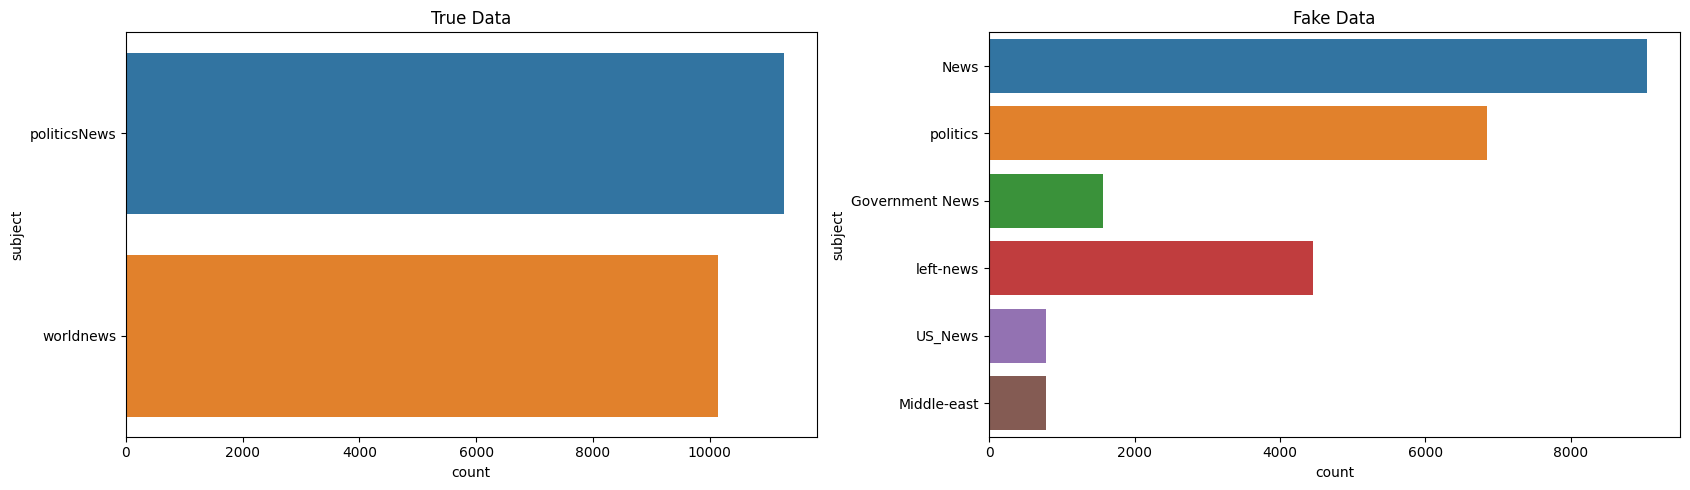

In [43]:
fig , axes = plt.subplots(1,2, figsize = (17,5))
sns.countplot(data=df_true, y='subject',ax = axes[0])
sns.countplot(data = df_fake,y = 'subject')
axes[0].set_title("True Data")
axes[1].set_title("Fake Data")
plt.tight_layout()
plt.show();

In [44]:
df_true["label"] = 0
df_fake["label"] = 1


df = pd.concat([df_true,df_fake], ignore_index = True)
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [45]:
df.label.value_counts()

1    23481
0    21417
Name: label, dtype: int64

In [46]:
df['content'] = df['subject']+' '+df['title']
df.head()

,title,text,subject,date,label,content
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,"politicsNews As U.S. budget fight looms, Repub..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,politicsNews U.S. military to accept transgend...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,politicsNews Senior U.S. Republican senator: '...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,politicsNews FBI Russia probe helped by Austra...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,politicsNews Trump wants Postal Service to cha...


In [47]:
df['content'][5]

'politicsNews White House, Congress prepare for talks on spending, immigration'

In [48]:
df.drop(['title', 'text', 'subject', 'date'], axis = 1, inplace = True)

In [49]:
df.head()

,label,content
0,0,"politicsNews As U.S. budget fight looms, Repub..."
1,0,politicsNews U.S. military to accept transgend...
2,0,politicsNews Senior U.S. Republican senator: '...
3,0,politicsNews FBI Russia probe helped by Austra...
4,0,politicsNews Trump wants Postal Service to cha...


In [ ]:
!python -m spacy download en_core_web_lg

2023-12-13 19:23:00.095105: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-13 19:23:00.095184: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-13 19:23:00.095221: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-13 19:23:01.913433: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [50]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [92]:
def preprocess_vectorize(text):
    doc = nlp(text)

    filtered_token = []

    for token in doc:
        if not token.is_stop and not token.is_punct:
            filtered = token.lemma_
            filtered_token.append(filtered)

    return " ".join(filtered_token)


In [93]:
p =preprocess_vectorize('politicsNews White House, Congress prepare for talks on spending, immigration')
p

'politicsnew White House Congress prepare talk spending immigration'

In [91]:
nlp(p).vector.shape

(300,)

In [94]:
df['preprocessed_content'] = df['content'].apply(preprocess_vectorize)

In [95]:
df['preprocessed_content'][:5]

0    politicsnew U.S. budget fight loom Republicans...
1    politicsnew U.S. military accept transgender r...
2    politicsnew senior U.S. republican senator let...
3    politicsnew FBI Russia probe help australian d...
4    politicsnew Trump want Postal Service charge A...
Name: preprocessed_content, dtype: object

In [96]:
df['vectors'] = df['preprocessed_content'].apply(lambda text: nlp(text).vector)

In [100]:
df.head()

,label,content,preprocessed_content,vectors
0,0,"politicsNews As U.S. budget fight looms, Repub...",politicsnew U.S. budget fight loom Republicans...,"[-1.9302123, 1.0374669, -2.547089, 1.4108701, ..."
1,0,politicsNews U.S. military to accept transgend...,politicsnew U.S. military accept transgender r...,"[-1.3078874, 1.25373, -1.6017386, 2.3538337, 3..."
2,0,politicsNews Senior U.S. Republican senator: '...,politicsnew senior U.S. republican senator let...,"[-0.6396448, 1.639319, -3.6522722, 0.8970178, ..."
3,0,politicsNews FBI Russia probe helped by Austra...,politicsnew FBI Russia probe help australian d...,"[1.0661944, 0.5736222, -2.0940452, 1.3315468, ..."
4,0,politicsNews Trump wants Postal Service to cha...,politicsnew Trump want Postal Service charge A...,"[0.3622138, 0.19733751, -0.6624137, 2.559576, ..."


In [133]:
x = df['vectors']
y = df['label']

In [138]:
x= np.stack(x)

In [102]:
from sklearn.model_selection import train_test_split

In [139]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = scaler.fit_transform(x)

In [140]:
from imblearn.over_sampling import SMOTE


smote=SMOTE(sampling_strategy='minority')
x_new,y_new=smote.fit_resample(X,y)



In [141]:
y_new.value_counts()

0    23481
1    23481
Name: label, dtype: int64

In [184]:
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, test_size=0.11, random_state = 0, stratify = y_new)

In [185]:
xtrain.shape

(41796, 300)

In [186]:
ytrain.value_counts()

0    20898
1    20898
Name: label, dtype: int64

In [187]:
ytest.value_counts()

0    2583
1    2583
Name: label, dtype: int64

In [188]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

clf_MNB = MultinomialNB()

clf_MNB.fit(xtrain, ytrain)
ypred_MNB = clf_MNB.predict(xtest)

train_MNB =clf_MNB.score(xtrain, ytrain)
test_MNB =clf_MNB.score(xtest, ytest)
print(f'Train Acc: {train_MNB}\nTest Acc: {test_MNB}\n\nClassification Report:\n{classification_report(ytest, ypred_MNB)} ')


Train Acc: 0.898578811369509
Test Acc: 0.8937282229965157

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      2583
           1       0.90      0.89      0.89      2583

    accuracy                           0.89      5166
   macro avg       0.89      0.89      0.89      5166
weighted avg       0.89      0.89      0.89      5166
 


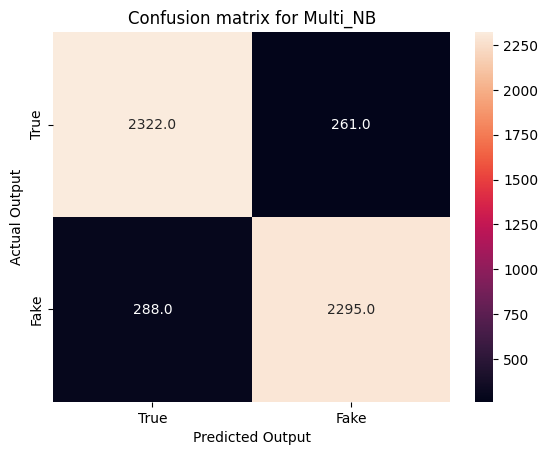

In [189]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

confusion_m =confusion_matrix(ytest, ypred_MNB)

sns.heatmap(confusion_m, annot = True, fmt = '.1f',
            xticklabels = ['True', 'Fake'],
            yticklabels = ['True', 'Fake'])
plt.xlabel('Predicted Output')
plt.ylabel('Actual Output')
plt.title("Confusion matrix for Multi_NB")
plt.show();

In [191]:
ytest[:5]

45894    0
15612    0
33494    1
4081     0
12059    0
Name: label, dtype: int64

In [193]:
ypred_MNB[:5]

array([0, 0, 1, 0, 0])

In [198]:
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, test_size=0.11, random_state = 0, stratify = y_new)

In [205]:
from sklearn.neighbors import KNeighborsClassifier

clf_kn = KNeighborsClassifier()

clf_kn.fit(xtrain, ytrain)
ypred_kn = clf_kn.predict(xtest)

train_kn =clf_kn.score(xtrain, ytrain)
test_kn =clf_kn.score(xtest, ytest)
print(f'Train Acc: {train_kn}\nTest Acc: {test_kn}\n\nClassification Report:\n{classification_report(ytest, ypred_kn)} ')


Train Acc: 0.9720308163460618
Test Acc: 0.9564459930313589

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96      2583
           1       0.93      0.98      0.96      2583

    accuracy                           0.96      5166
   macro avg       0.96      0.96      0.96      5166
weighted avg       0.96      0.96      0.96      5166
 


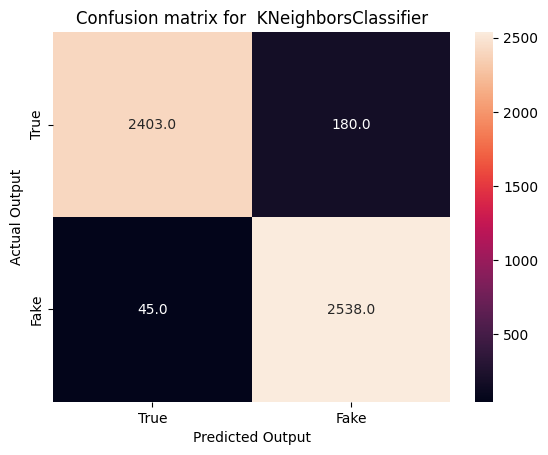

In [195]:
confusion_m =confusion_matrix(ytest, ypred_kn)

sns.heatmap(confusion_m, annot = True, fmt = '.1f',
            xticklabels = ['True', 'Fake'],
            yticklabels = ['True', 'Fake'])
plt.xlabel('Predicted Output')
plt.ylabel('Actual Output')
plt.title("Confusion matrix for  KNeighborsClassifier")
plt.show();

In [206]:
ypred_kn[:5]

array([0, 0, 1, 0, 0])

In [207]:
ytest[:5]

45894    0
15612    0
33494    1
4081     0
12059    0
Name: label, dtype: int64

In [210]:
df['preprocessed_content'][33494]

'politic OBAMA INSPIRED COP hate update TX Restaurant Manager write FCK U Sheriff Receipt'